# Customer Lifetime Value

CLTV indicates the total revenue of the customer throughout the relationship. CLTV helps companies focus on potential customers who can generate more revenue in the future. CLTV demonstrates the implications of acquiring long-term customers compared to short-term customers.

The idea of this project is to calculate customers' CLTV and develop a machine learning model to predict CLTV for new customers.
The model used in this project was linear regression.

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Configure Matplotlib

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

## Load data

In [3]:
df_retail = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
# Variables
print("Online Retail dataset has {} data points with {} variables each.".format(*df_retail.shape))

Online Retail dataset has 541909 data points with 8 variables each.


## Data description

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The Online Retail data frame has 541909 rows and 8 columns.

This data frame contains the following columns:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

## Explore data

In [4]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# data types of columns
df_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
# Check missing value
df_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Removing Duplicates

In [7]:
filtered_data=df_retail[['Country','CustomerID']].drop_duplicates()

## Top ten country's customer

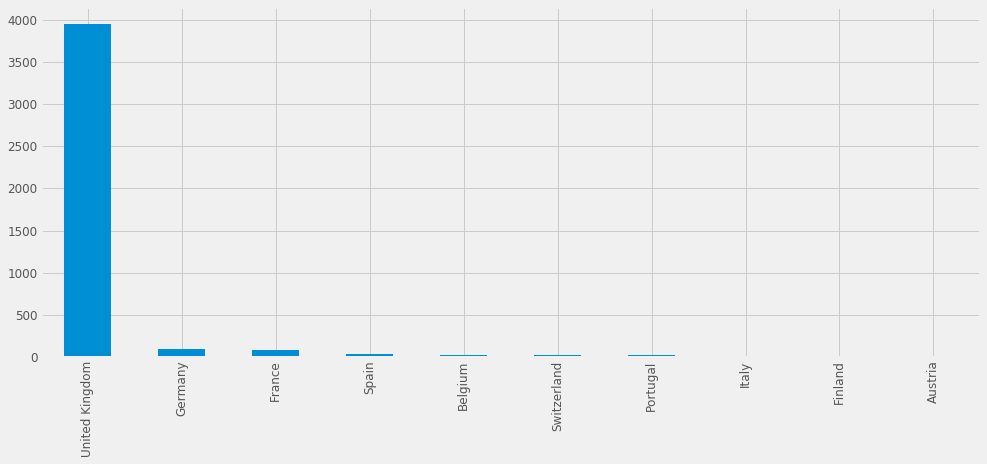

In [8]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

## The vast majority of customers are from 'United Kingdom", so we will filter by UK

In [9]:
df_retail_uk=df_retail[df_retail.Country=='United Kingdom']
df_retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Descriptive Statistics

In [10]:
df_retail_uk.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


## Filter the columns that are important for analysis

CustomerID: will uniquely define your customers.

InvoiceDate: help you calculate numbers of days customer stayed with your product.

InvoiceNo: helps you to count the number of time transaction performed(frequency).

Quantity: is purchased item units in each transaction.

UnitPrice: of each unit purchased by the customer will help you to calculate the total purchasedamount.

In [11]:
df_retail_uk=df_retail_uk[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

## Calulate Total Purchase

In [12]:
df_retail_uk['TotalPurchase'] = df_retail_uk['Quantity'] * df_retail_uk['UnitPrice']

## Monthly Revenue

In [13]:
df_revenue = df_retail_uk.copy()
df_revenue['InvoiceDate'] = pd.to_datetime(df_revenue['InvoiceDate'])
df_revenue['InvoiceYearMonth'] = df_revenue['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_revenue = df_revenue.groupby(['InvoiceYearMonth'])['TotalPurchase'].sum().reset_index()
df_revenue.head()

,InvoiceYearMonth,TotalPurchase
0,201012,676742.620
1,201101,434308.300
2,201102,408247.910
3,201103,559707.390
4,201104,442254.041


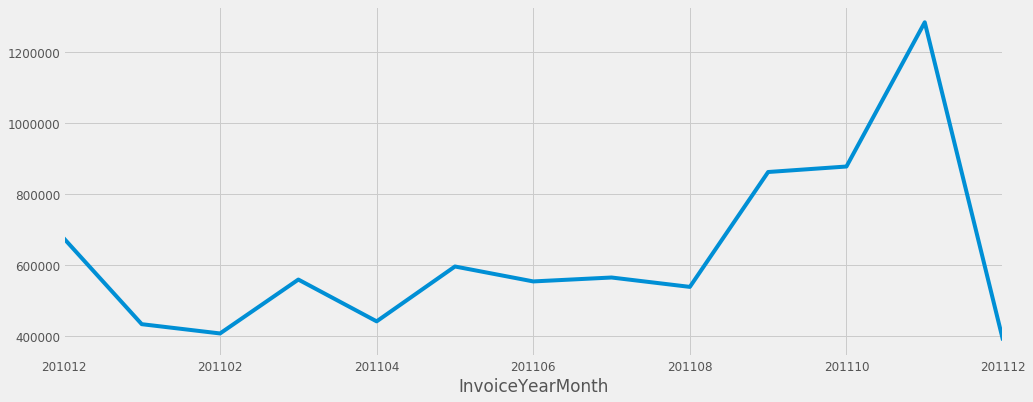

In [14]:
df_revenue['InvoiceYearMonth'] = df_revenue['InvoiceYearMonth'].apply(str)
df_revenue.set_index('InvoiceYearMonth')['TotalPurchase'].plot();

## Monthly Revenue Growth Rate

In [15]:
df_revenue['MonthlyGrowth'] = df_revenue['TotalPurchase'].pct_change()
# Filter the dataframe, as we don’t have the full December data
df_revenue = df_revenue[df_revenue['InvoiceYearMonth'] != '201112']                                           

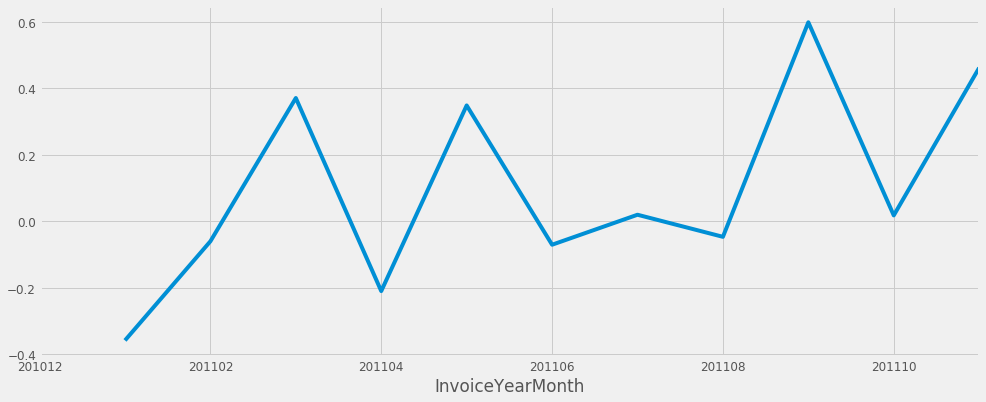

In [16]:
df_revenue.set_index('InvoiceYearMonth')['MonthlyGrowth'].plot();

## Monthly Active Customers

In [17]:
df_customers = df_retail_uk.copy()
df_customers['InvoiceYearMonth'] = df_customers['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_customers['InvoiceYearMonth'] = df_customers['InvoiceYearMonth'].apply(str)
df_customers = df_customers.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

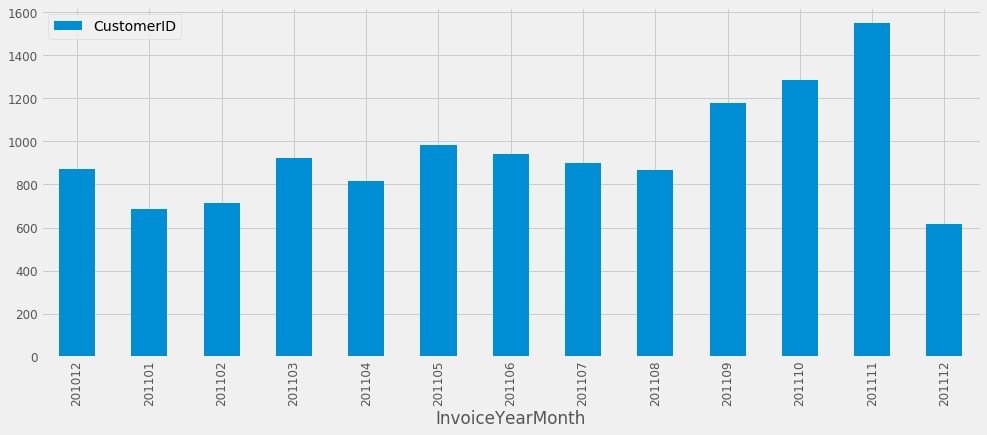

In [18]:
df_customers.plot.bar(x="InvoiceYearMonth", y="CustomerID")

## Monthly Order Count

In [19]:
df_monthly_sales = df_retail_uk.copy()
df_monthly_sales['InvoiceYearMonth'] = df_monthly_sales['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_monthly_sales['InvoiceYearMonth'] = df_monthly_sales['InvoiceYearMonth'].apply(str)
df_monthly_sales = df_monthly_sales.groupby('InvoiceYearMonth')['Quantity'].nunique().reset_index()

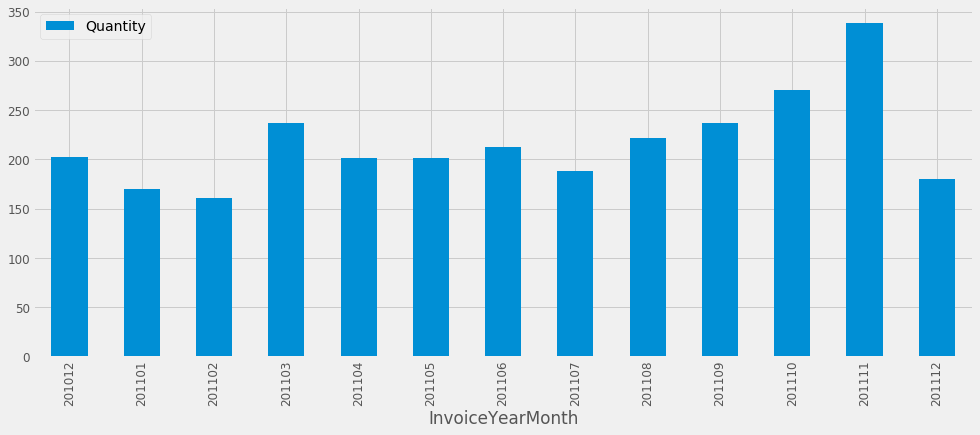

In [20]:
df_monthly_sales.plot.bar(x="InvoiceYearMonth", y="Quantity")

## Average Revenue per Order

In [21]:
df_monthly_order_avg = df_retail_uk.copy()
df_monthly_order_avg['InvoiceYearMonth'] = df_monthly_order_avg['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_monthly_order_avg['InvoiceYearMonth'] = df_monthly_order_avg['InvoiceYearMonth'].apply(str)
df_monthly_order_avg = df_monthly_order_avg.groupby('InvoiceYearMonth')['TotalPurchase'].mean().reset_index()

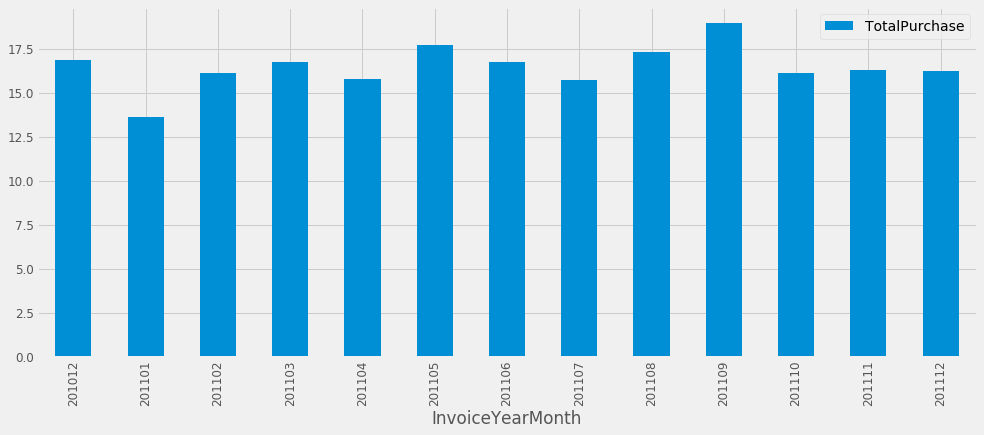

In [22]:
df_monthly_order_avg.plot.bar(x="InvoiceYearMonth", y="TotalPurchase")

## To start CLTV calculations, we have to perform the operations below:
### Calculate the number of days between the current date and the date of the last purchase of each customer;
### Calculate the number of orders for each customer;
### Calculate the sum of the purchase price for each customer.

In [23]:
df_retail_uk_group=df_retail_uk.groupby('CustomerID').agg({'InvoiceDate':lambda date: (date.max() - date.min()),
'InvoiceNo': lambda num: len(num),
'Quantity': lambda quant: quant.sum(),
'TotalPurchase': lambda price: price.sum()})

In [24]:
df_retail_uk.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


## Calculate CLTV using following formula:

### CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
### Customer Value = Average Order Value * Purchase Frequency

## Calculate Average Order Value

In [25]:
df_retail_uk_group['avg_order_value']=df_retail_uk_group['TotalPurchase']/df_retail_uk_group['InvoiceNo']

## Calculate Purchase Frequency

In [26]:
purchase_frequency=sum(df_retail_uk_group['InvoiceNo'])/df_retail_uk_group.shape[0]

## Calculate Repeat Rate and Churn Rate

In [27]:
repeat_rate=df_retail_uk_group[df_retail_uk_group.InvoiceNo > 1 ].shape[ 0 ]/df_retail_uk_group.shape[0]

In [28]:
churn_rate=1-repeat_rate

## Calculate Profir Margin

In [29]:
df_retail_uk_group['profit_margin']=df_retail_uk_group['TotalPurchase']*0.05

In [30]:
df_retail_uk_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0 days 00:16:00,2,0,0.00,0.000000,0.0000
12747.0,366 days 22:56:00,103,1275,4196.01,40.737961,209.8005
12748.0,372 days 23:32:00,4642,24210,29072.10,6.262839,1453.6050
12749.0,209 days 18:31:00,231,1422,3868.20,16.745455,193.4100
12820.0,323 days 02:38:00,59,722,942.34,15.971864,47.1170


## Calculate Customer Lifetime Value

In [31]:
# Customer Value
df_retail_uk_group['CLV']=(df_retail_uk_group['avg_order_value']*purchase_frequency)/churn_rate

In [32]:
#Customer Lifetime Value
df_retail_uk_group['cust_lifetime_value']=df_retail_uk_group['CLV']*df_retail_uk_group['profit_margin']

In [33]:
df_retail_uk_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0 days 00:16:00,2,0,0.00,0.000000,0.0000,0.000000,0.000000e+00
12747.0,366 days 22:56:00,103,1275,4196.01,40.737961,209.8005,193975.946191,4.069625e+07
12748.0,372 days 23:32:00,4642,24210,29072.10,6.262839,1453.6050,29820.838919,4.334772e+07
12749.0,209 days 18:31:00,231,1422,3868.20,16.745455,193.4100,79734.363158,1.542142e+07
12820.0,323 days 02:38:00,59,722,942.34,15.971864,47.1170,76050.872997,3.583289e+06


## Prediction Model for CLTV

In [34]:
df_retail_uk['month_yr'] = df_retail_uk['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
df_retail_uk.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


In [35]:
df_sale=df_retail_uk.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum')
df_sale.head()

month_yr,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
CustomerID,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12747.0,NaN,301.70,706.27,438.50,NaN,303.04,NaN,376.30,310.78,771.31,312.73,675.38,NaN
12748.0,1100.37,659.42,4177.68,1070.27,389.64,418.77,1113.27,2006.26,1011.94,2224.42,9295.57,1385.84,4218.65
12749.0,NaN,1750.45,NaN,763.06,NaN,NaN,NaN,NaN,NaN,782.10,572.59,NaN,NaN
12820.0,NaN,NaN,NaN,210.35,NaN,170.46,NaN,NaN,NaN,NaN,NaN,343.76,217.77


## Let's sum all the months sales

In [36]:
df_sale['CLV']=df_sale.iloc[:,2:].sum(axis=1)
df_sale.head()

month_yr,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
CustomerID,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
12747.0,NaN,301.70,706.27,438.50,NaN,303.04,NaN,376.30,310.78,771.31,312.73,675.38,NaN,3894.31
12748.0,1100.37,659.42,4177.68,1070.27,389.64,418.77,1113.27,2006.26,1011.94,2224.42,9295.57,1385.84,4218.65,27312.31
12749.0,NaN,1750.45,NaN,763.06,NaN,NaN,NaN,NaN,NaN,782.10,572.59,NaN,NaN,2117.75
12820.0,NaN,NaN,NaN,210.35,NaN,170.46,NaN,NaN,NaN,NaN,NaN,343.76,217.77,942.34


## Prepare Dataset for Modeling

In [37]:
df_sale = df_sale.replace(np.nan, 0)
df_sale.head()

month_yr,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
CustomerID,,,,,,,,,,,,,,
12346.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,3894.31
12748.0,1100.37,659.42,4177.68,1070.27,389.64,418.77,1113.27,2006.26,1011.94,2224.42,9295.57,1385.84,4218.65,27312.31
12749.0,0.00,1750.45,0.00,763.06,0.00,0.00,0.00,0.00,0.00,782.10,572.59,0.00,0.00,2117.75
12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


## Selecting Feature

In [38]:
X=df_sale[['Dec-2011','Nov-2011','Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=df_sale[['CLV']]

## Splitting Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

## Model Development

In [40]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

## Coefficients

In [41]:
# coefficient
coeff = list(zip(X, linreg.coef_))

# print coefficients
print(['y-intercept = {}'.format(linreg.intercept_), sorted(coeff, key = lambda x: x[1])])

['y-intercept = [105.1194966]', [('Dec-2011', array([1.48565943, 0.82228789, 1.30995314, 2.01246674, 0.85278568,
       2.81968521]))]]


## Model Evaluation

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [42]:
# calculate R2 score
print('R2:',format(linreg.score(X_test, y_test)))

# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.9746513352913642
MAE: 491.5814679555218
MSE 2470897.1570388945
RMSE: 1571.9087623137975
